In [51]:
import pandas as pd
date = pd.read_csv('data.csv')

date.describe()

,Time,REAL_DATA,TELE_DATA
count,39000.000000,39000.000000,39000.000000
mean,19499.500000,194.946846,192.131179
std,11258.474586,16.528355,16.451177
min,0.000000,171.000000,168.000000
25%,9749.750000,179.000000,176.000000
50%,19499.500000,191.000000,188.000000
75%,29249.250000,211.000000,208.000000
max,38999.000000,223.000000,220.000000


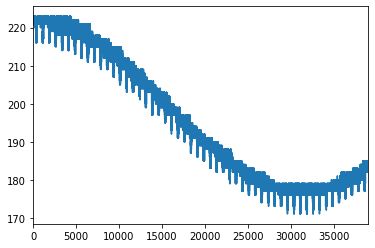

In [52]:
date_masurate = date['REAL_DATA']
date_masurate.plot.line()
plt.show()

In [53]:
def rolling_window(func, window_size, series):
    output = ['NA']*window_size
    for i in range(window_size,len(series)):
        output.append(func(series[i-window_size:i]))
    return output

In [58]:
date['300_step_ma']=rolling_window(lambda x : sum(x)/len(x), 300, date['REAL_DATA'].tolist())

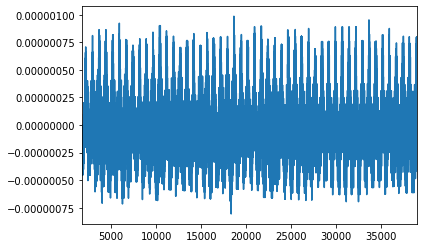

In [62]:
from matplotlib import pyplot as plt

date = date[date['300_step_ma'] != 'NA']

date['300_step_ma1']=rolling_window(lambda x : sum(x)/len(x), 300, date['300_step_ma'].tolist())

date = date[date['300_step_ma1'] != 'NA']

moving_average = date['300_step_ma1'].diff().diff()
moving_average.plot.line()
plt.show()

Window length reset to 301


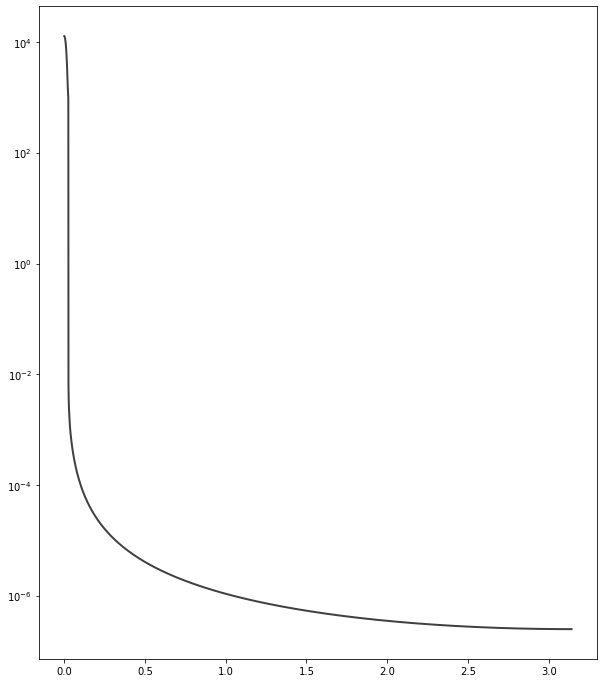

In [61]:
from quantecon import periodogram, ARMA
x, y_netezit = periodogram(date['300_step_ma1'], window='hamming', window_len=300)

fig, ax = plt.subplots(1, 1, figsize=(10,12))

ax.semilogy(x, y_netezit, 'k-', lw=2, alpha=0.75,
        label='standard smoothed periodogram')

plt.show()